# EOF reconstruction of emulated data
Here we want to reconstruct the data emulated with'ENSEMBLE2_MultiLinReg_EOF1.ipynb' based on the PCs emulated and the eof from the CNRM-CM6-1 PPE ensemble. We start with TOA net radiative fluxes. 

# Importe modules

In [1]:
# Computational modules 
%matplotlib inline
import xarray as xr
import glob
import os
import numpy as np
import netCDF4
from netCDF4 import Dataset
import pandas as pd
import re
from array import array
from pylab import *
#import geopandas
from eofs.xarray import Eof
from eofs.multivariate.standard import MultivariateEof

# Plotting modules 
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas.plotting
import matplotlib.ticker as ticker
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import BoundaryNorm

# Functions definition

In [2]:
import sys
sys.path.append('/data/home/globc/peatier/CNRMppe')
import Fonctions
from Fonctions import get_wavg_budget_df
from Fonctions import wavg 
from Fonctions import plotlines_Xdf
from Fonctions import plotlines_1df
from Fonctions import Deltas_Lambda
from Fonctions import get_3D_budget_xarr
from Fonctions import get_3D_xarr
from Fonctions import get_3D_SW_xarr
from Fonctions import get_3D_LW_xarr

# EOF and SW_mean

In [3]:
eof1 = pd.read_pickle('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOFmap1_SW.npy').to_xarray().to_array()
eof2 = pd.read_pickle('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOFmap2_SW.npy').to_xarray().to_array()
eof3 = pd.read_pickle('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOFmap3_SW.npy').to_xarray().to_array()
eof4 = pd.read_pickle('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOFmap4_SW.npy').to_xarray().to_array()
eof5 = pd.read_pickle('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOFmap5_SW.npy').to_xarray().to_array()

eof1 = eof1[0,:,:].rename({'variable':'mode'})
eof2 = eof2[0,:,:].rename({'variable':'mode'})
eof3 = eof3[0,:,:].rename({'variable':'mode'})
eof4 = eof4[0,:,:].rename({'variable':'mode'})
eof5 = eof5[0,:,:].rename({'variable':'mode'})

In [4]:
pc1_PPE = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF1pc_SW.npy')
pc2_PPE = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF2pc_SW.npy')
pc3_PPE = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF3pc_SW.npy')
pc4_PPE = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF4pc_SW.npy')
pc5_PPE = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF5pc_SW.npy')

PC_df_PPE = pd.DataFrame(pc1_PPE)
PC_df_PPE['pc1'] = pc1_PPE
PC_df_PPE['pc2'] = pc2_PPE
PC_df_PPE['pc3'] = pc3_PPE
PC_df_PPE['pc4'] = pc4_PPE
PC_df_PPE['pc5'] = pc5_PPE
PC_df_PPE = PC_df_PPE.drop(labels = 0, axis=1)
PC_df_PPE

,pc1,pc2,pc3,pc4,pc5
0,2.047448,-1.880354,0.695999,0.411820,1.125474
1,0.089597,0.496123,0.467096,1.178996,-0.048062
2,0.116893,-1.046918,0.690331,0.520984,-0.466149
3,0.185766,-0.481640,-1.690326,1.516757,-1.070102
4,0.715678,-2.260945,0.754597,0.866218,0.442685
...,...,...,...,...,...
97,0.171422,1.157356,1.041254,0.640260,0.379373
98,-1.242337,0.038289,0.261865,-0.553909,-1.030117
99,-0.690952,0.455630,0.653965,0.037837,0.280628
100,0.174499,0.459449,1.376661,0.565957,1.431853


In [5]:
SW_mean =  pd.read_pickle('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_SW_mean.npy').to_xarray().to_array()
SW_mean = SW_mean[0,:,:].rename({'variable':'mode'})

In [6]:
varFrac = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_varFrac_SW.npy')
varFrac

array([0.6594671 , 0.11340688, 0.08062291, 0.02677332, 0.01880083],
      dtype=float32)

# Multi-Linear Regression predictions

## Import PCs and EOFs

In [7]:
pc1 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/MultiLinReg_prediction_eof1_SW.npy')
pc2 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/MultiLinReg_prediction_eof2_SW.npy')
pc3 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/MultiLinReg_prediction_eof3_SW.npy')
pc4 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/MultiLinReg_prediction_eof4_SW.npy')
pc5 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/MultiLinReg_prediction_eof5_SW.npy')

PC_df = pd.DataFrame(pc1)
PC_df['pc1'] = pc1
PC_df['pc2'] = pc2
PC_df['pc3'] = pc3
PC_df['pc4'] = pc4
PC_df['pc5'] = pc5
PC_df = PC_df.drop(labels = 0, axis=1)
#PC_df

pc1 = PC_df['pc1'].to_xarray().rename({'index':'mode'})
pc2 = PC_df['pc2'].to_xarray().rename({'index':'mode'})
pc3 = PC_df['pc3'].to_xarray().rename({'index':'mode'})
pc4 = PC_df['pc4'].to_xarray().rename({'index':'mode'})
pc5 = PC_df['pc5'].to_xarray().rename({'index':'mode'})

In [8]:
pc1_val = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/MultiLinReg_validation_eof1_SW.npy')
pc2_val = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/MultiLinReg_validation_eof2_SW.npy')
pc3_val = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/MultiLinReg_validation_eof3_SW.npy')
pc4_val = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/MultiLinReg_validation_eof4_SW.npy')
pc5_val = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/MultiLinReg_validation_eof5_SW.npy')

PC_val_df = pd.DataFrame(pc1_val)
PC_val_df['pc1'] = pc1_val
PC_val_df['pc2'] = pc2_val
PC_val_df['pc3'] = pc3_val
PC_val_df['pc4'] = pc4_val
PC_val_df['pc5'] = pc5_val
PC_val_df = PC_val_df.drop(labels = 0, axis=1)
#PC_val_df

pc1_val = PC_val_df['pc1'].to_xarray().rename({'index':'mode'})
pc2_val = PC_val_df['pc2'].to_xarray().rename({'index':'mode'})
pc3_val = PC_val_df['pc3'].to_xarray().rename({'index':'mode'})
pc4_val = PC_val_df['pc4'].to_xarray().rename({'index':'mode'})
pc5_val = PC_val_df['pc5'].to_xarray().rename({'index':'mode'})

## Reconstruction

In [9]:
Recon_data = eof1*pc1 + eof2*pc2 + eof3*pc3 + eof4*pc4 + eof5*pc5#*varFrac[4]
Recon_data = Recon_data + SW_mean
#Recon_data

In [10]:
Recon_data_val = eof1*pc1_val + eof2*pc2_val + eof3*pc3_val + eof4*pc4_val + eof5*pc5_val
Recon_data_val = Recon_data_val + SW_mean
#Recon_data

# Calcul de biais CERES

In [11]:
def load_monthly_clim(path, filename, variables) :
    
    file = xr.open_mfdataset(path+filename,combine='by_coords')
    df=file[variables].to_dataframe()
    
    # Compute Climatological Annual Cycle :
    df1=df.reset_index(level=['time', 'lat', 'lon'])
    df1['month']=pd.DatetimeIndex(df1['time']).month # time in years
    df_mean=df1.groupby(['month', 'lat', 'lon']).mean()
    
    return df_mean

In [12]:
path_observation = '/data/home/globc/peatier/obs_data/'
filename = 'CERES_EBAF-TOA_Ed4.1_Subset_200003-201910_regrid.nc'
    
# Load data and compute Annual Cycle :
file = xr.open_mfdataset(path_observation+filename,combine='by_coords')
#file
variables = ['toa_sw_all_mon','toa_lw_all_mon', 'toa_net_all_mon']
df_obs = load_monthly_clim(path_observation, filename, variables)
df_obs

toa_sw_all_mon  toa_lw_all_mon  toa_net_all_mon
month lat        lon                                                       
1     -88.927735 0.00000        344.953522      189.246185       -38.599289
                 1.40625        344.953522      189.246185       -38.599289
                 2.81250        344.953522      189.246185       -38.599289
                 4.21875        344.992493      189.144440       -38.531315
                 5.62500        345.007721      189.104630       -38.504715
...                                    ...             ...              ...
12     88.927735 352.96875        0.000000      171.476639      -171.476639
                 354.37500        0.000000      171.476639      -171.476639
                 355.78125        0.000000      171.500351      -171.500351
                 357.18750        0.000000      171.560974      -171.560974
                 358.59375        0.000000      171.560974      -171.560974

[393216 rows x 3 columns]

In [13]:
obs = df_obs.groupby(['lat','lon']).mean().to_xarray()
obs

<xarray.Dataset>
Dimensions:          (lat: 128, lon: 256)
Coordinates:
  * lat              (lat) float64 -88.93 -87.54 -86.14 ... 86.14 87.54 88.93
  * lon              (lon) float64 0.0 1.406 2.812 4.219 ... 355.8 357.2 358.6
Data variables:
    toa_sw_all_mon   (lat, lon) float32 121.35958 121.35958 ... 103.85324
    toa_lw_all_mon   (lat, lon) float32 142.8201 142.8201 ... 194.14125
    toa_net_all_mon  (lat, lon) float32 -91.40278 -91.40278 ... -126.49493

In [14]:
biases_SW = Recon_data - obs['toa_sw_all_mon']
biases_SW = biases_SW.to_dataframe(name = 'bias_SW')
#biases_SW

In [15]:
biases_SW_val = Recon_data_val - obs['toa_sw_all_mon']
biases_SW_val = biases_SW_val.to_dataframe(name = 'bias_SW')
#biases_SW

In [16]:
#...................................................................
# GLOBAL MEAN WEIGHTED WITH COS(LAT)

import xarray as xr
import numpy as np
import pandas as pd


def wavg(df, start_yr, variables):
    # First, we need to convert latitude to radians and the time into year
    df1=df.reset_index(level=[ 'lat'])
    df1['latr'] = np.deg2rad(df1['lat']) # lat in radians 


    # Then, we find the zonal mean by averaging along the latitude circles
    df2=df1.groupby(['mode', 'lat']).mean()

    # Finally, we use the cosine of the converted latitudes as weights for the average
    df2['weights'] = np.cos(df2['latr'])
    result=pd.DataFrame()
    df2_tmp=df2.groupby(['mode']).mean()
    result[variables]=df2_tmp[variables]
    N=len(result)
    YR=start_yr
    i=0
    while i < N:
        yr=YR+i
        tmp=df2.loc[yr]
        n=len(variables)
        j=0
        while j < n:
            t = (tmp[variables[j]]*tmp['weights']).sum()/tmp['weights'].sum()
            result[variables[j]].iloc[i]=t
            j = j + 1
        i = i + 1

    #r = result.mean()
    return result

In [17]:
variables = ['bias_SW']
df = biases_SW.abs()
pred_bias_SW = wavg(df,0,variables)


Feedbacks_pred = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/MultiLinReg_prediction_FdbckN.npy")
pred_bias_SW['Fdbck'] = Feedbacks_pred
#pred_bias_SW

In [18]:
variables = ['bias_SW']
df = biases_SW_val.abs()
val_bias_SW = wavg(df,0,variables)


Feedbacks_val = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/MultiLinReg_validation_FdbckN.npy")
val_bias_SW['Fdbck'] = Feedbacks_val
#val_bias_SW

In [19]:
PPE_bias_SW = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_bias_SW.npy')
Feedbacks = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/Net_feedbacks.npy")
Biases_official_SW = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_bias_official_SW.npy')
Feedbacks_official = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/Net_feedbacks_official.npy")

Feedbacks_full = np.append(Feedbacks,Feedbacks_official)
PPE_Bias_df = pd.DataFrame(PPE_bias_SW, columns=['bias_SW'])
PPE_Bias_df['Fdbck'] = Feedbacks_full
PPE_Bias_df

,bias_SW,Fdbck
0,27.247898,-0.789073
1,15.596387,-1.666454
2,14.220888,-1.214114
3,16.675899,-1.292415
4,18.631144,-0.756525
...,...,...
98,13.070312,-1.571997
99,13.532138,-1.489540
100,16.540748,-1.430751
101,18.031293,-1.699042


# LASSO predictions

In [20]:
pc1 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LASSO_prediction_eof1_SW.npy')
pc2 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LASSO_prediction_eof2_SW.npy')
pc3 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LASSO_prediction_eof3_SW.npy')
pc4 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LASSO_prediction_eof4_SW.npy')
pc5 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LASSO_prediction_eof5_SW.npy')

PC_df_LASSO = pd.DataFrame(pc1)
PC_df_LASSO['pc1'] = pc1
PC_df_LASSO['pc2'] = pc2
PC_df_LASSO['pc3'] = pc3
PC_df_LASSO['pc4'] = pc4
PC_df_LASSO['pc5'] = pc5
PC_df_LASSO = PC_df_LASSO.drop(labels = 0, axis=1)
#PC_df

pc1 = PC_df_LASSO['pc1'].to_xarray().rename({'index':'mode'})
pc2 = PC_df_LASSO['pc2'].to_xarray().rename({'index':'mode'})
pc3 = PC_df_LASSO['pc3'].to_xarray().rename({'index':'mode'})
pc4 = PC_df_LASSO['pc4'].to_xarray().rename({'index':'mode'})
pc5 = PC_df_LASSO['pc5'].to_xarray().rename({'index':'mode'})

In [21]:
pc1_val = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LASSO_validation_eof1_SW.npy')
pc2_val = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LASSO_validation_eof2_SW.npy')
pc3_val = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LASSO_validation_eof3_SW.npy')
pc4_val = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LASSO_validation_eof4_SW.npy')
pc5_val = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LASSO_validation_eof5_SW.npy')

PC_val_df_LASSO = pd.DataFrame(pc1_val)
PC_val_df_LASSO['pc1'] = pc1_val
PC_val_df_LASSO['pc2'] = pc2_val
PC_val_df_LASSO['pc3'] = pc3_val
PC_val_df_LASSO['pc4'] = pc4_val
PC_val_df_LASSO['pc5'] = pc5_val
PC_val_df_LASSO = PC_val_df_LASSO.drop(labels = 0, axis=1)
#PC_val_df

pc1_val = PC_val_df_LASSO['pc1'].to_xarray().rename({'index':'mode'})
pc2_val = PC_val_df_LASSO['pc2'].to_xarray().rename({'index':'mode'})
pc3_val = PC_val_df_LASSO['pc3'].to_xarray().rename({'index':'mode'})
pc4_val = PC_val_df_LASSO['pc4'].to_xarray().rename({'index':'mode'})
pc5_val = PC_val_df_LASSO['pc5'].to_xarray().rename({'index':'mode'})

In [22]:
Recon_data_LASSO = eof1*pc1 + eof2*pc2 + eof3*pc3 + eof4*pc4 + eof5*pc5
Recon_data_LASSO = Recon_data_LASSO + SW_mean
#Recon_data

In [23]:
Recon_data_LASSO_val = eof1*pc1_val + eof2*pc2_val + eof3*pc3_val + eof4*pc4_val + eof5*pc5_val
Recon_data_LASSO_val = Recon_data_LASSO_val + SW_mean

In [24]:
def load_monthly_clim(path, filename, variables) :
    
    file = xr.open_mfdataset(path+filename,combine='by_coords')
    df=file[variables].to_dataframe()
    
    # Compute Climatological Annual Cycle :
    df1=df.reset_index(level=['time', 'lat', 'lon'])
    df1['month']=pd.DatetimeIndex(df1['time']).month # time in years
    df_mean=df1.groupby(['month', 'lat', 'lon']).mean()
    
    return df_mean

In [25]:
path_observation = '/data/home/globc/peatier/obs_data/'
filename = 'CERES_EBAF-TOA_Ed4.1_Subset_200003-201910_regrid.nc'
    
# Load data and compute Annual Cycle :
file = xr.open_mfdataset(path_observation+filename,combine='by_coords')
#file
variables = ['toa_sw_all_mon','toa_lw_all_mon', 'toa_net_all_mon']
df_obs = load_monthly_clim(path_observation, filename, variables)
df_obs

toa_sw_all_mon  toa_lw_all_mon  toa_net_all_mon
month lat        lon                                                       
1     -88.927735 0.00000        344.953522      189.246185       -38.599289
                 1.40625        344.953522      189.246185       -38.599289
                 2.81250        344.953522      189.246185       -38.599289
                 4.21875        344.992493      189.144440       -38.531315
                 5.62500        345.007721      189.104630       -38.504715
...                                    ...             ...              ...
12     88.927735 352.96875        0.000000      171.476639      -171.476639
                 354.37500        0.000000      171.476639      -171.476639
                 355.78125        0.000000      171.500351      -171.500351
                 357.18750        0.000000      171.560974      -171.560974
                 358.59375        0.000000      171.560974      -171.560974

[393216 rows x 3 columns]

In [26]:
obs = df_obs.groupby(['lat','lon']).mean().to_xarray()
#obs

In [27]:
biases_SW = Recon_data_LASSO - obs['toa_sw_all_mon']
biases_SW = biases_SW.to_dataframe(name = 'bias_SW')
#biases_SW

In [28]:
biases_SW_val = Recon_data_LASSO_val - obs['toa_sw_all_mon']
biases_SW_val = biases_SW_val.to_dataframe(name = 'bias_SW')
#biases_SW_val

In [29]:
#...................................................................
# GLOBAL MEAN WEIGHTED WITH COS(LAT)

import xarray as xr
import numpy as np
import pandas as pd


def wavg(df, start_yr, variables):
    # First, we need to convert latitude to radians and the time into year
    df1=df.reset_index(level=[ 'lat'])
    df1['latr'] = np.deg2rad(df1['lat']) # lat in radians 


    # Then, we find the zonal mean by averaging along the latitude circles
    df2=df1.groupby(['mode', 'lat']).mean()

    # Finally, we use the cosine of the converted latitudes as weights for the average
    df2['weights'] = np.cos(df2['latr'])
    result=pd.DataFrame()
    df2_tmp=df2.groupby(['mode']).mean()
    result[variables]=df2_tmp[variables]
    N=len(result)
    YR=start_yr
    i=0
    while i < N:
        yr=YR+i
        tmp=df2.loc[yr]
        n=len(variables)
        j=0
        while j < n:
            t = (tmp[variables[j]]*tmp['weights']).sum()/tmp['weights'].sum()
            result[variables[j]].iloc[i]=t
            j = j + 1
        i = i + 1

    #r = result.mean()
    return result

In [30]:
variables = ['bias_SW']
df = biases_SW.abs()
LASSO_pred_bias_SW = wavg(df,0,variables)


Feedbacks_pred = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LASSO_prediction_FdbckN.npy")
LASSO_pred_bias_SW['Fdbck'] = Feedbacks_pred
#LASSO_pred_bias_SW

In [31]:
variables = ['bias_SW']
df = biases_SW_val.abs()
LASSO_val_bias_SW = wavg(df,0,variables)


Feedbacks_val_LASSO = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LASSO_validation_FdbckN.npy")
LASSO_val_bias_SW['Fdbck'] = Feedbacks_val_LASSO
#LASSO_val_bias_SW

In [32]:
PPE_bias_SW = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_bias_SW.npy')
Feedbacks = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/Net_feedbacks.npy")
Biases_official_SW = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_bias_official_SW.npy')
Feedbacks_official = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/Net_feedbacks_official.npy")

Feedbacks_full = np.append(Feedbacks,Feedbacks_official)
PPE_Bias_df = pd.DataFrame(PPE_bias_SW, columns=['bias_SW'])
PPE_Bias_df['Fdbck'] = Feedbacks_full
PPE_Bias_df

,bias_SW,Fdbck
0,27.247898,-0.789073
1,15.596387,-1.666454
2,14.220888,-1.214114
3,16.675899,-1.292415
4,18.631144,-0.756525
...,...,...
98,13.070312,-1.571997
99,13.532138,-1.489540
100,16.540748,-1.430751
101,18.031293,-1.699042


# Neural Network predictions

In [33]:
pc1 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/NN_prediction_eof1_SW.npy')
pc2 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/NN_prediction_eof2_SW.npy')
pc3 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/NN_prediction_eof3_SW.npy')
pc4 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/NN_prediction_eof4_SW.npy')
pc5 = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/NN_prediction_eof5_SW.npy')

PC_df_NN = pd.DataFrame(pc1)
PC_df_NN['pc1'] = pc1
PC_df_NN['pc2'] = pc2
PC_df_NN['pc3'] = pc3
PC_df_NN['pc4'] = pc4
PC_df_NN['pc5'] = pc5
PC_df_NN = PC_df_NN.drop(labels = 0, axis=1)
#PC_df_NN

pc1 = PC_df_NN['pc1'].to_xarray().rename({'index':'mode'})
pc2 = PC_df_NN['pc2'].to_xarray().rename({'index':'mode'})
pc3 = PC_df_NN['pc3'].to_xarray().rename({'index':'mode'})
pc4 = PC_df_NN['pc4'].to_xarray().rename({'index':'mode'})
pc5 = PC_df_NN['pc5'].to_xarray().rename({'index':'mode'})

In [34]:
pc1_val = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/NN_validation_eof1_SW.npy')
pc2_val = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/NN_validation_eof2_SW.npy')
pc3_val = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/NN_validation_eof3_SW.npy')
pc4_val = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/NN_validation_eof4_SW.npy')
pc5_val = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/NN_validation_eof5_SW.npy')

PC_val_df_NN = pd.DataFrame(pc1_val)
PC_val_df_NN['pc1'] = pc1_val
PC_val_df_NN['pc2'] = pc2_val
PC_val_df_NN['pc3'] = pc3_val
PC_val_df_NN['pc4'] = pc4_val
PC_val_df_NN['pc5'] = pc5_val
PC_val_df_NN = PC_val_df_NN.drop(labels = 0, axis=1)
#PC_val_df

pc1_val = PC_val_df_NN['pc1'].to_xarray().rename({'index':'mode'})
pc2_val = PC_val_df_NN['pc2'].to_xarray().rename({'index':'mode'})
pc3_val = PC_val_df_NN['pc3'].to_xarray().rename({'index':'mode'})
pc4_val = PC_val_df_NN['pc4'].to_xarray().rename({'index':'mode'})
pc5_val = PC_val_df_NN['pc5'].to_xarray().rename({'index':'mode'})

In [35]:
Recon_data_NN = eof1*pc1 + eof2*pc2 + eof3*pc3 + eof4*pc4 + eof5*pc5
Recon_data_NN = Recon_data_NN + SW_mean
#Recon_data

In [36]:
Recon_data_NN_val = eof1*pc1_val + eof2*pc2_val + eof3*pc3_val + eof4*pc4_val + eof5*pc5_val
Recon_data_NN_val = Recon_data_NN_val + SW_mean

In [37]:
path_observation = '/data/home/globc/peatier/obs_data/'
filename = 'CERES_EBAF-TOA_Ed4.1_Subset_200003-201910_regrid.nc'
    
# Load data and compute Annual Cycle :
file = xr.open_mfdataset(path_observation+filename,combine='by_coords')
#file
variables = ['toa_sw_all_mon','toa_lw_all_mon', 'toa_net_all_mon']
df_obs = load_monthly_clim(path_observation, filename, variables)
df_obs

toa_sw_all_mon  toa_lw_all_mon  toa_net_all_mon
month lat        lon                                                       
1     -88.927735 0.00000        344.953522      189.246185       -38.599289
                 1.40625        344.953522      189.246185       -38.599289
                 2.81250        344.953522      189.246185       -38.599289
                 4.21875        344.992493      189.144440       -38.531315
                 5.62500        345.007721      189.104630       -38.504715
...                                    ...             ...              ...
12     88.927735 352.96875        0.000000      171.476639      -171.476639
                 354.37500        0.000000      171.476639      -171.476639
                 355.78125        0.000000      171.500351      -171.500351
                 357.18750        0.000000      171.560974      -171.560974
                 358.59375        0.000000      171.560974      -171.560974

[393216 rows x 3 columns]

In [38]:
obs = df_obs.groupby(['lat','lon']).mean().to_xarray()
#obs

In [39]:
biases_SW = Recon_data_NN - obs['toa_sw_all_mon']
biases_SW = biases_SW.to_dataframe(name = 'bias_SW')
#biases_SW

In [40]:
biases_SW_val = Recon_data_NN_val - obs['toa_sw_all_mon']
biases_SW_val = biases_SW_val.to_dataframe(name = 'bias_SW')
#biases_SW_val

In [41]:
variables = ['bias_SW']
df = biases_SW.abs()
NN_pred_bias_SW = wavg(df,0,variables)


Feedbacks_pred = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/NN_prediction_FdbckN.npy")
NN_pred_bias_SW['Fdbck'] = Feedbacks_pred
#LASSO_pred_bias_SW

In [42]:
variables = ['bias_SW']
df = biases_SW_val.abs()
NN_val_bias_SW = wavg(df,0,variables)


Feedbacks_val_NN = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/NN_validation_FdbckN.npy")
#Feedbacks_val_NN = Feedbacks_val_NN[30:]
NN_val_bias_SW['Fdbck'] = Feedbacks_val_NN

In [43]:
PPE_bias_SW = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_bias_SW.npy')
Feedbacks = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/Net_feedbacks.npy")
Biases_official_SW = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_bias_official_SW.npy')
Feedbacks_official = np.load(file="/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/Net_feedbacks_official.npy")

Feedbacks_full = np.append(Feedbacks,Feedbacks_official)
PPE_Bias_df = pd.DataFrame(PPE_bias_SW, columns=['bias_SW'])
PPE_Bias_df['Fdbck'] = Feedbacks_full
PPE_Bias_df

,bias_SW,Fdbck
0,27.247898,-0.789073
1,15.596387,-1.666454
2,14.220888,-1.214114
3,16.675899,-1.292415
4,18.631144,-0.756525
...,...,...
98,13.070312,-1.571997
99,13.532138,-1.489540
100,16.540748,-1.430751
101,18.031293,-1.699042


# Create Plot

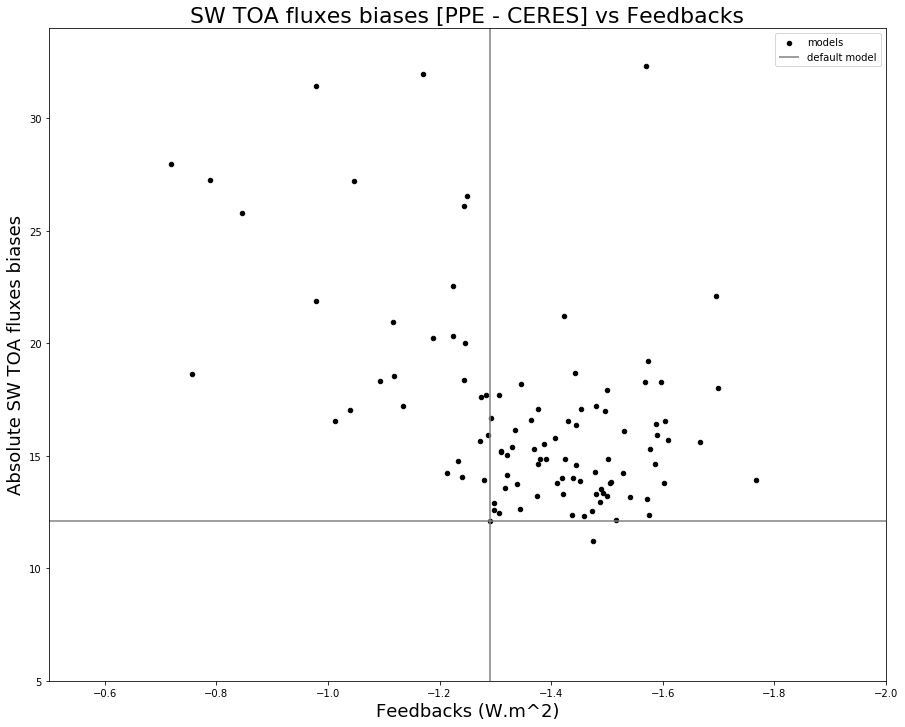

In [44]:
ax = plt.gca()
title = 'SW TOA fluxes biases [PPE - CERES] vs Feedbacks'

PPE_Bias_df.plot(kind='scatter', x='Fdbck', y='bias_SW', color='black', figsize=(15, 12), 
                     marker="o", ax = ax)
plt.hlines(Biases_official_SW,xmin = -2.0,xmax = -0.5,label='official simulation', colors='gray', 
           linestyles='solid')
plt.vlines(Feedbacks_official,ymin = 5,ymax = 34,label='official simulation', colors='gray', 
           linestyles='solid')

plt.xlabel('Feedbacks (W.m^2)', fontsize=18)
plt.ylabel('Absolute SW TOA fluxes biases', fontsize=18)
plt.legend(['models', 'default model'])
plt.title(title, fontsize=22)
plt.ylim(5,34)
plt.xlim(-0.5,-2.0)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/Biases_VS_feedbacks.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

In [45]:
PPE_bias_LW = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE_Bias_npy.npy')
PPE_Bias_df['bias_LW'] = PPE_bias_LW
PPE_Bias_df['bias_SW+LW'] = PPE_Bias_df['bias_LW'] + PPE_Bias_df['bias_SW']
PPE_Bias_df

,bias_SW,Fdbck,bias_LW,bias_SW+LW
0,27.247898,-0.789073,10.496304,37.744202
1,15.596387,-1.666454,10.165805,25.762192
2,14.220888,-1.214114,11.602198,25.823086
3,16.675899,-1.292415,11.300294,27.976192
4,18.631144,-0.756525,9.273055,27.904199
...,...,...,...,...
98,13.070312,-1.571997,11.238238,24.308550
99,13.532138,-1.489540,9.615012,23.147150
100,16.540748,-1.430751,9.472723,26.013471
101,18.031293,-1.699042,7.942104,25.973398


In [46]:
Biases_official_LW = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/Biases_official_LW.npy')
Biases_official_SW_LW = Biases_official_LW + Biases_official_SW
Biases_official_SW_LW

18.990535926448015

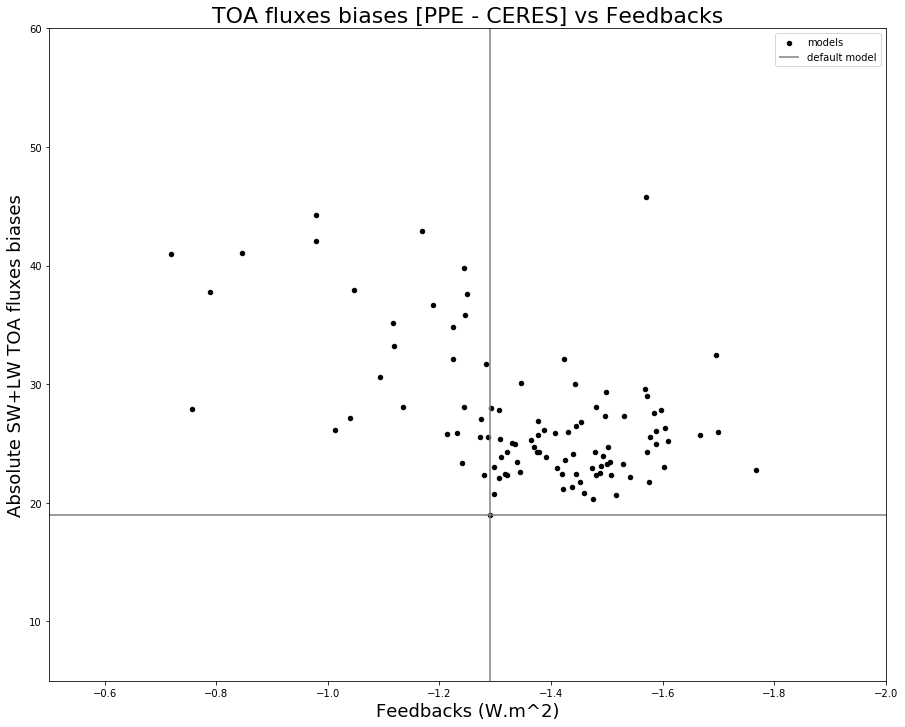

In [47]:
ax = plt.gca()
title = 'TOA fluxes biases [PPE - CERES] vs Feedbacks'

PPE_Bias_df.plot(kind='scatter', x='Fdbck', y='bias_SW+LW', color='black', figsize=(15, 12), 
                     marker="o", ax = ax)
plt.hlines(Biases_official_SW_LW,xmin = -2.0,xmax = -0.5,label='official simulation', colors='gray', 
           linestyles='solid')
plt.vlines(Feedbacks_official,ymin = 5,ymax = 60,label='official simulation', colors='gray', 
           linestyles='solid')

plt.xlabel('Feedbacks (W.m^2)', fontsize=18)
plt.ylabel('Absolute SW+LW TOA fluxes biases', fontsize=18)
plt.legend(['models', 'default model'])
plt.title(title, fontsize=22)
plt.ylim(5,60)
plt.xlim(-0.5,-2.0)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/Biases_VS_feedbacks.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

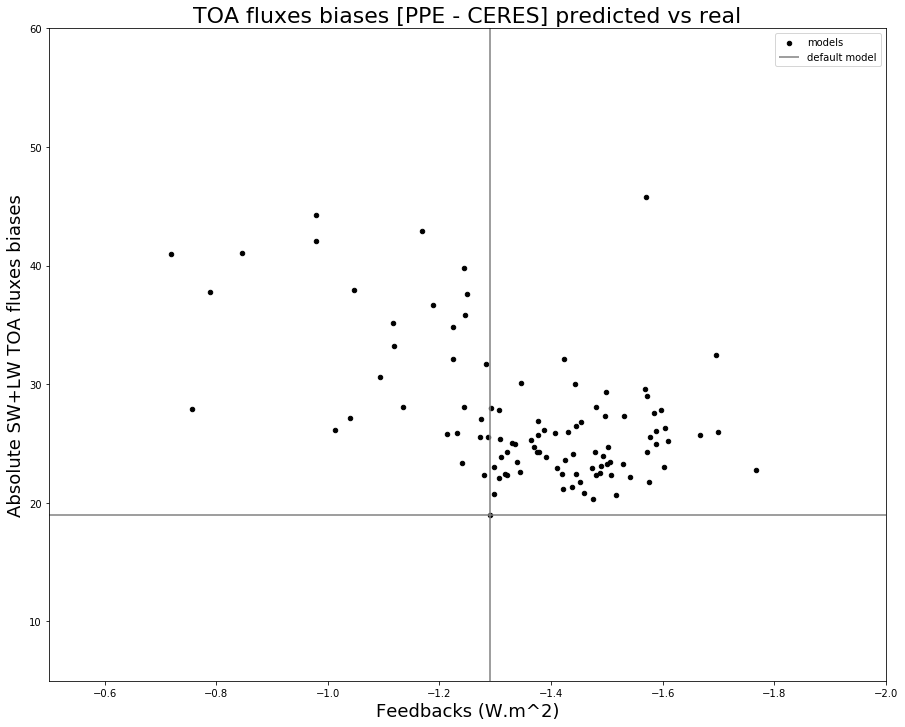

In [48]:
ax = plt.gca()
title = 'TOA fluxes biases [PPE - CERES] predicted vs real'



PPE_Bias_df.plot(kind='scatter', x='Fdbck', y='bias_SW+LW', color='black', figsize=(15, 12), 
                     marker="o", ax = ax)
plt.hlines(Biases_official_SW_LW,xmin = -2.0,xmax = -0.5,label='official simulation', colors='gray', 
           linestyles='solid')
plt.vlines(Feedbacks_official,ymin = 5,ymax = 60,label='official simulation', colors='gray', 
           linestyles='solid')

plt.xlabel('Feedbacks (W.m^2)', fontsize=18)
plt.ylabel('Absolute SW+LW TOA fluxes biases', fontsize=18)
plt.legend(['models', 'default model'])
plt.title(title, fontsize=22)
plt.ylim(5,60)
plt.xlim(-0.5,-2.0)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/Biases_VS_feedbacks.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

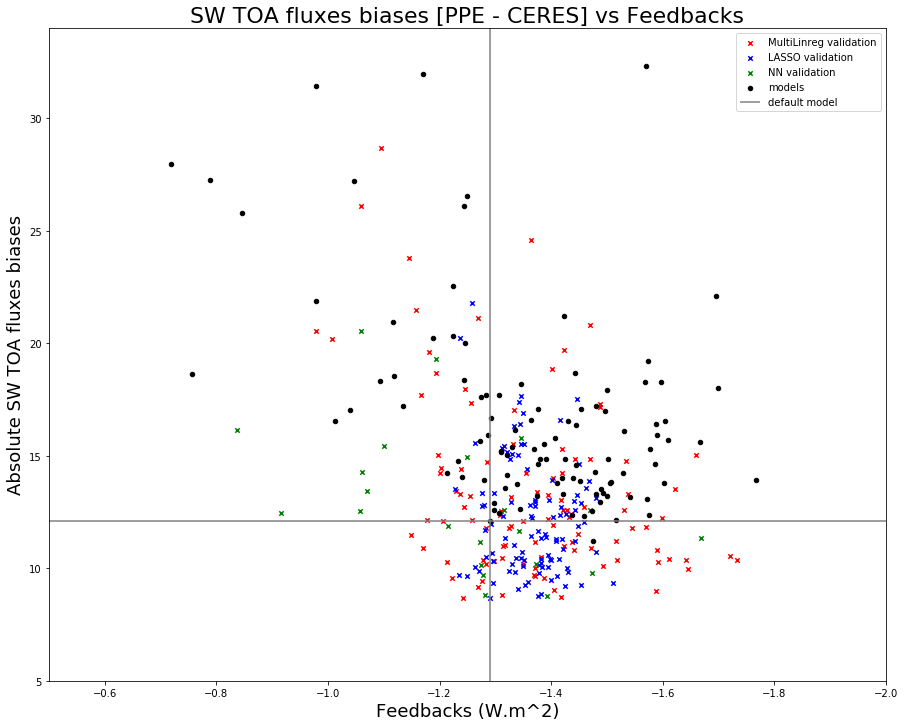

In [66]:
ax = plt.gca()
title = 'SW TOA fluxes biases [PPE - CERES] vs Feedbacks'
val_bias_SW.plot(kind='scatter', x='Fdbck', y='bias_SW', color='red', alpha=1, figsize=(15, 12), 
                     marker='x', ax = ax)
LASSO_val_bias_SW.plot(kind='scatter', x='Fdbck', y='bias_SW', color='blue', alpha=1, figsize=(15, 12), 
                     marker='x', ax = ax)
NN_val_bias_SW.plot(kind='scatter', x='Fdbck', y='bias_SW', color='green', alpha=1, figsize=(15, 12), 
                     marker='x', ax = ax)
PPE_Bias_df.plot(kind='scatter', x='Fdbck', y='bias_SW', color='black', figsize=(15, 12), 
                     marker="o", ax = ax)
plt.hlines(Biases_official_SW,xmin = -2.0,xmax = -0.5,label='official simulation', colors='gray', 
           linestyles='solid')
plt.vlines(Feedbacks_official,ymin = 5,ymax = 34,label='official simulation', colors='gray', 
           linestyles='solid')

plt.xlabel('Feedbacks (W.m^2)', fontsize=18)
plt.ylabel('Absolute SW TOA fluxes biases', fontsize=18)
plt.legend(['MultiLinreg validation','LASSO validation', 'NN validation','models', 'default model'])
plt.title(title, fontsize=22)
plt.ylim(5,34)
plt.xlim(-0.5,-2.0)

# Enregistrer la figure .....................

plt.savefig("/data/home/globc/peatier/figures/Biases_VS_feedbacks.png", 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

In [50]:
LASSO_val_bias_LW = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LASSO_val_bias_LW_npy.npy')
                         
LASSO_val_bias = LASSO_val_bias_SW
LASSO_val_bias['bias_LW'] = LASSO_val_bias_LW
LASSO_val_bias['bias_SW+LW'] = LASSO_val_bias['bias_LW']+LASSO_val_bias['bias_SW']
LASSO_val_bias

,bias_SW,Fdbck,bias_LW,bias_SW+LW
mode,,,,
0,13.529084,-1.227211,6.917176,20.446260
1,13.126641,-1.479482,6.504349,19.630990
2,11.870601,-1.448021,8.305746,20.176347
3,10.858209,-1.420761,7.316701,18.174909
4,9.702706,-1.234400,7.004968,16.707674
...,...,...,...,...
97,12.322678,-1.313332,6.447986,18.770664
98,9.347926,-1.511060,6.518576,15.866502
99,9.855778,-1.429732,6.060668,15.916446


In [51]:
val_bias_LW = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/val_bias_LW_npy.npy')

val_bias = val_bias_SW
val_bias['bias_LW'] = val_bias_LW
val_bias['bias_SW+LW'] = val_bias['bias_LW']+val_bias['bias_SW']
val_bias        

,bias_SW,Fdbck,bias_LW,bias_SW+LW
mode,,,,
0,13.312970,-1.236757,6.283112,19.596081
1,12.239569,-1.598955,7.180011,19.419580
2,12.157928,-1.176888,9.974846,22.132773
3,12.292966,-1.432397,7.896502,20.189468
4,9.557863,-1.221617,9.717211,19.275074
...,...,...,...,...
97,12.589043,-1.530092,6.336961,18.926004
98,10.820383,-1.588945,7.651165,18.471548
99,8.715641,-1.417616,6.770488,15.486129


In [52]:
NN_val_bias_LW = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/NN_val_bias_LW_npy.npy')
                         
NN_val_bias = NN_val_bias_SW
NN_val_bias['bias_LW'] = NN_val_bias_LW
NN_val_bias['bias_SW+LW'] = NN_val_bias['bias_LW']+NN_val_bias['bias_SW']
NN_val_bias

,bias_SW,Fdbck,bias_LW,bias_SW+LW
mode,,,,
0,14.267626,-1.061798,12.555082,26.822708
1,20.565412,-1.059626,6.585225,27.150636
2,11.153038,-1.273089,7.496547,18.649585
3,16.142022,-0.836734,6.478019,22.620041
4,19.319625,-1.193906,9.882849,29.202474
5,11.662793,-1.341973,8.101784,19.764577
6,9.723310,-1.277548,12.981151,22.704461
7,10.156027,-1.274823,6.862887,17.018915
8,11.867833,-1.214293,8.727971,20.595804


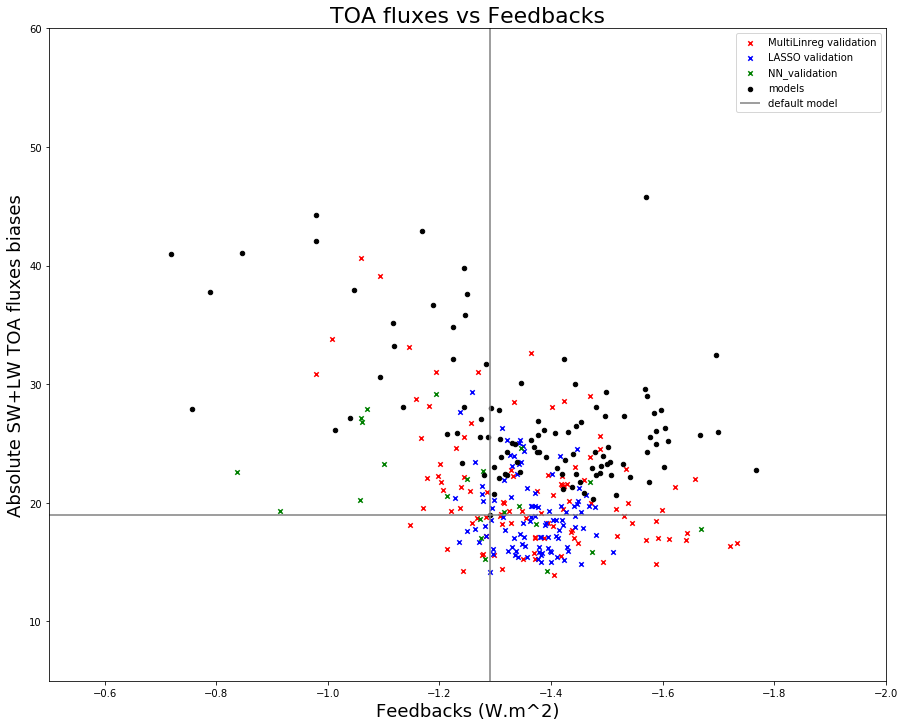

In [53]:
ax = plt.gca()
title = 'TOA fluxes vs Feedbacks'
val_bias_SW.plot(kind='scatter', x='Fdbck', y='bias_SW+LW', color='red', alpha=1, figsize=(15, 12), 
                     marker='x', ax = ax)
LASSO_val_bias_SW.plot(kind='scatter', x='Fdbck', y='bias_SW+LW', color='blue', alpha=1, figsize=(15, 12), 
                     marker='x', ax = ax)
NN_val_bias_SW.plot(kind='scatter', x='Fdbck', y='bias_SW+LW', color='green', alpha=1, figsize=(15, 12), 
                     marker='x', ax = ax)
PPE_Bias_df.plot(kind='scatter', x='Fdbck', y='bias_SW+LW', color='black', figsize=(15, 12), 
                     marker="o", ax = ax)
plt.hlines(Biases_official_SW_LW,xmin = -2.0,xmax = -0.5,label='official simulation', colors='gray', 
           linestyles='solid')
plt.vlines(Feedbacks_official,ymin = 5,ymax = 60,label='official simulation', colors='gray', 
           linestyles='solid')

plt.xlabel('Feedbacks (W.m^2)', fontsize=18)
plt.ylabel('Absolute SW+LW TOA fluxes biases', fontsize=18)
plt.legend(['MultiLinreg validation','LASSO validation','NN_validation','models', 'default model'])
plt.title(title, fontsize=22)
plt.ylim(5,60)
plt.xlim(-0.5,-2.0)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/Biases_VS_feedbacks.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

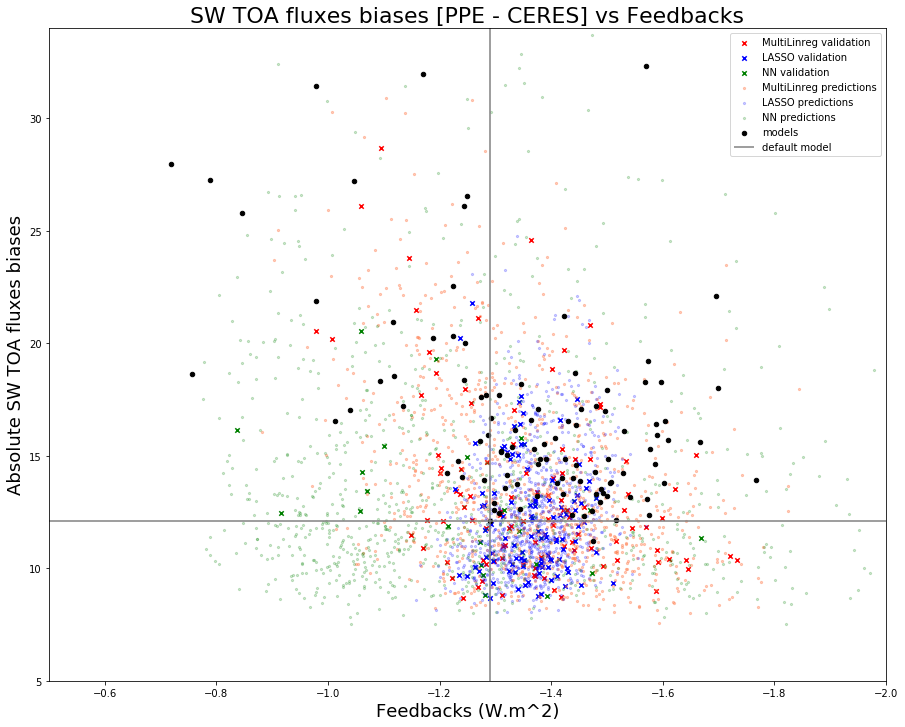

In [54]:
ax = plt.gca()
title = 'SW TOA fluxes biases [PPE - CERES] vs Feedbacks'
val_bias_SW.plot(kind='scatter', x='Fdbck', y='bias_SW', color='red', alpha=1, figsize=(15, 12), 
                     marker='x', ax = ax)
LASSO_val_bias_SW.plot(kind='scatter', x='Fdbck', y='bias_SW', color='blue', alpha=1, figsize=(15, 12), 
                     marker='x', ax = ax)
NN_val_bias_SW.plot(kind='scatter', x='Fdbck', y='bias_SW', color='green', alpha=1, figsize=(15, 12), 
                     marker='x', ax = ax)
pred_bias_SW.plot(kind='scatter', x='Fdbck', y='bias_SW', color='coral', alpha=0.4, figsize=(15, 12), 
                     marker='.', ax = ax)
LASSO_pred_bias_SW.plot(kind='scatter', x='Fdbck', y='bias_SW', color='blue', alpha=0.2, figsize=(15, 12), 
                     marker='.', ax = ax)
NN_pred_bias_SW.plot(kind='scatter', x='Fdbck', y='bias_SW', color='green', alpha=0.2, figsize=(15, 12), 
                     marker='.', ax = ax)
PPE_Bias_df.plot(kind='scatter', x='Fdbck', y='bias_SW', color='black', figsize=(15, 12), 
                     marker="o", ax = ax)
plt.hlines(Biases_official_SW,xmin = -2.0,xmax = -0.5,label='official simulation', colors='gray', 
           linestyles='solid')
plt.vlines(Feedbacks_official,ymin = 5,ymax = 34,label='official simulation', colors='gray', 
           linestyles='solid')

plt.xlabel('Feedbacks (W.m^2)', fontsize=18)
plt.ylabel('Absolute SW TOA fluxes biases', fontsize=18)
plt.legend(['MultiLinreg validation','LASSO validation','NN validation','MultiLinreg predictions',
            'LASSO predictions', 'NN predictions',
            'models', 'default model'])
plt.title(title, fontsize=22)
plt.ylim(5,34)
plt.xlim(-0.5,-2.0)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/Biases_VS_feedbacks.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

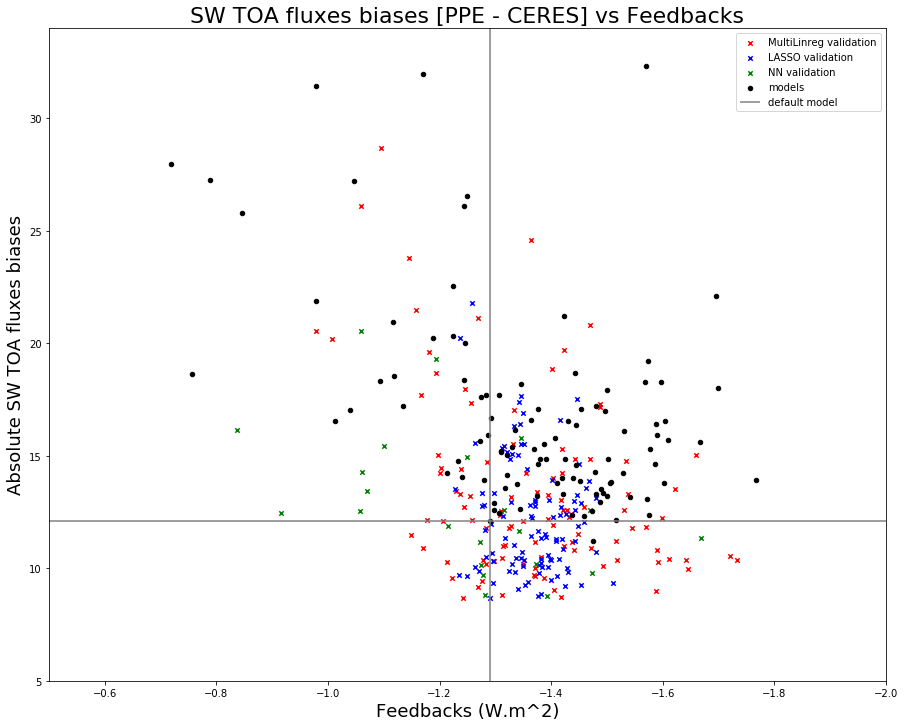

In [55]:
ax = plt.gca()
title = 'SW TOA fluxes biases [PPE - CERES] vs Feedbacks'
val_bias_SW.plot(kind='scatter', x='Fdbck', y='bias_SW', color='red', alpha=1, figsize=(15, 12), 
                     marker='x', ax = ax)
LASSO_val_bias_SW.plot(kind='scatter', x='Fdbck', y='bias_SW', color='blue', alpha=1, figsize=(15, 12), 
                     marker='x', ax = ax)
NN_val_bias_SW.plot(kind='scatter', x='Fdbck', y='bias_SW', color='green', alpha=1, figsize=(15, 12), 
                     marker='x', ax = ax)
#pred_bias_SW.plot(kind='scatter', x='Fdbck', y='bias_SW', color='coral', alpha=0.4, figsize=(15, 12), 
#                     marker='.', ax = ax)
#LASSO_pred_bias_SW.plot(kind='scatter', x='Fdbck', y='bias_SW', color='blue', alpha=0.2, figsize=(15, 12), 
#                     marker='.', ax = ax)
#NN_pred_bias_SW.plot(kind='scatter', x='Fdbck', y='bias_SW', color='green', alpha=0.2, figsize=(15, 12), 
#                     marker='.', ax = ax)
PPE_Bias_df.plot(kind='scatter', x='Fdbck', y='bias_SW', color='black', figsize=(15, 12), 
                     marker="o", ax = ax)
plt.hlines(Biases_official_SW,xmin = -2.0,xmax = -0.5,label='official simulation', colors='gray', 
           linestyles='solid')
plt.vlines(Feedbacks_official,ymin = 5,ymax = 34,label='official simulation', colors='gray', 
           linestyles='solid')

plt.xlabel('Feedbacks (W.m^2)', fontsize=18)
plt.ylabel('Absolute SW TOA fluxes biases', fontsize=18)
plt.legend(['MultiLinreg validation','LASSO validation','NN validation',
            'models', 'default model'])
plt.title(title, fontsize=22)
plt.ylim(5,34)
plt.xlim(-0.5,-2.0)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/Biases_VS_feedbacks.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

In [56]:
pred_bias_LW = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/pred_bias_LW_npy.npy') 

pred_bias = pred_bias_SW
pred_bias['bias_LW'] = pred_bias_LW
pred_bias['bias_SW+LW'] =pred_bias['bias_LW']+pred_bias['bias_SW']
pred_bias

,bias_SW,Fdbck,bias_LW,bias_SW+LW
mode,,,,
0,11.286997,-1.371700,7.078470,18.365466
1,15.926474,-1.494952,6.109720,22.036195
2,10.142353,-1.435011,5.587819,15.730172
3,16.101757,-1.598127,9.898753,26.000510
4,9.019795,-1.414539,6.640765,15.660560
...,...,...,...,...
995,12.367882,-1.510948,5.363618,17.731500
996,13.152106,-1.532805,9.167426,22.319531
997,11.934177,-1.454272,6.685045,18.619221


In [57]:
LASSO_pred_bias_LW = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/LASSO_pred_bias_LW_npy.npy') 

LASSO_pred_bias = LASSO_pred_bias_SW
LASSO_pred_bias['bias_LW'] = LASSO_pred_bias_LW
LASSO_pred_bias['bias_SW+LW'] =LASSO_pred_bias['bias_LW']+LASSO_pred_bias['bias_SW']
LASSO_pred_bias

,bias_SW,Fdbck,bias_LW,bias_SW+LW
mode,,,,
0,12.504584,-1.334177,6.477348,18.981932
1,11.199959,-1.286915,6.575684,17.775644
2,8.856324,-1.379185,5.537041,14.393365
3,15.684268,-1.363872,7.819748,23.504016
4,10.097569,-1.334536,6.472749,16.570318
...,...,...,...,...
995,11.377989,-1.373378,5.168028,16.546017
996,13.401738,-1.431346,8.101045,21.502783
997,12.165449,-1.310384,6.219196,18.384645


In [58]:
NN_pred_bias_LW = np.load('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/NN_pred_bias_LW_npy.npy') 

NN_pred_bias = NN_pred_bias_SW
NN_pred_bias['bias_LW'] = NN_pred_bias_LW
NN_pred_bias['bias_SW+LW'] =NN_pred_bias['bias_LW']+NN_pred_bias['bias_SW']
NN_pred_bias

,bias_SW,Fdbck,bias_LW,bias_SW+LW
mode,,,,
0,18.009697,-0.982684,7.215561,25.225258
1,9.757341,-1.404117,7.407107,17.164448
2,8.231404,-1.367516,6.894954,15.126358
3,14.696806,-1.833936,7.972547,22.669353
4,8.965902,-1.732250,8.036826,17.002728
...,...,...,...,...
995,11.392308,-1.533770,8.983690,20.375998
996,15.425534,-0.967697,9.295004,24.720538
997,11.310743,-1.582393,8.272896,19.583639


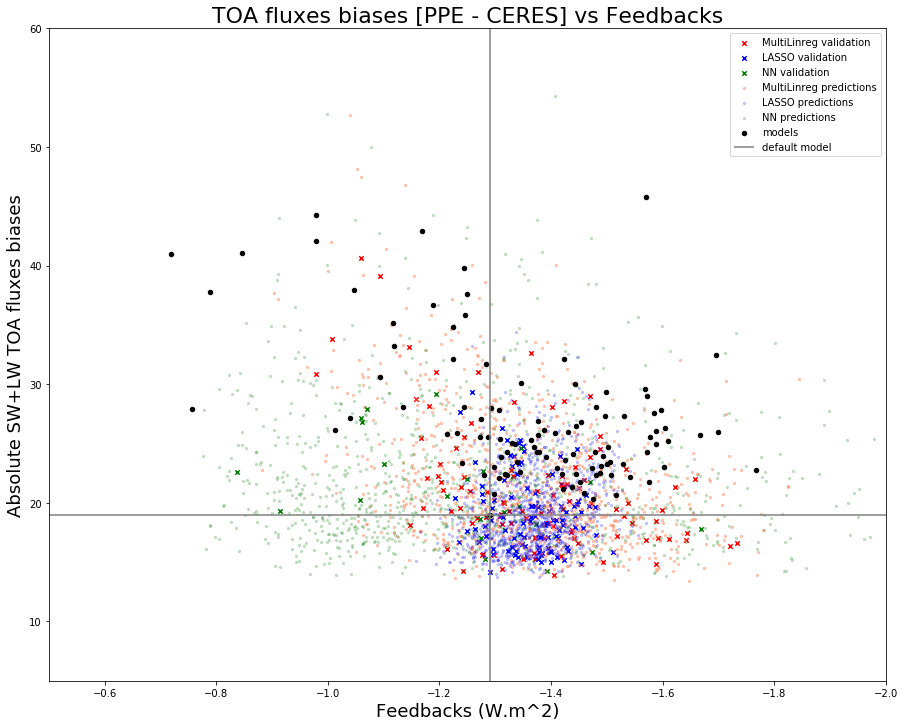

In [59]:
ax = plt.gca()
title = 'TOA fluxes biases [PPE - CERES] vs Feedbacks'
val_bias_SW.plot(kind='scatter', x='Fdbck', y='bias_SW+LW', color='red', alpha=1, figsize=(15, 12), 
                     marker='x', ax = ax)
LASSO_val_bias_SW.plot(kind='scatter', x='Fdbck', y='bias_SW+LW', color='blue', alpha=1, figsize=(15, 12), 
                     marker='x', ax = ax)
NN_val_bias_SW.plot(kind='scatter', x='Fdbck', y='bias_SW+LW', color='green', alpha=1, figsize=(15, 12), 
                     marker='x', ax = ax)
pred_bias.plot(kind='scatter', x='Fdbck', y='bias_SW+LW', color='coral', alpha=0.4, figsize=(15, 12), 
                     marker='.', ax = ax)
LASSO_pred_bias.plot(kind='scatter', x='Fdbck', y='bias_SW+LW', color='blue', alpha=0.2, figsize=(15, 12), 
                     marker='.', ax = ax)
NN_pred_bias.plot(kind='scatter', x='Fdbck', y='bias_SW+LW', color='green', alpha=0.2, figsize=(15, 12), 
                     marker='.', ax = ax)
PPE_Bias_df.plot(kind='scatter', x='Fdbck', y='bias_SW+LW', color='black', figsize=(15, 12), 
                     marker="o", ax = ax)
plt.hlines(Biases_official_SW_LW,xmin = -2.0,xmax = -0.5,label='official simulation', colors='gray', 
           linestyles='solid')
plt.vlines(Feedbacks_official,ymin = 5,ymax = 60,label='official simulation', colors='gray', 
           linestyles='solid')

plt.xlabel('Feedbacks (W.m^2)', fontsize=18)
plt.ylabel('Absolute SW+LW TOA fluxes biases', fontsize=18)
plt.legend(['MultiLinreg validation','LASSO validation','NN validation', 'MultiLinreg predictions',
            'LASSO predictions', 'NN predictions','models', 'default model'])
plt.title(title, fontsize=22)
plt.ylim(5,60)
plt.xlim(-0.5,-2.0)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/Biases_VS_feedbacks.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

In [60]:
fluxes_biases = PPE_Bias_df
fluxes_biases['bias_SW_true'] = fluxes_biases['bias_SW']
fluxes_biases['bias_LW_true'] = fluxes_biases['bias_LW']
fluxes_biases['bias_SW+LW_true'] = fluxes_biases['bias_SW+LW']
fluxes_biases = fluxes_biases.drop(columns = ['bias_SW', 'bias_LW', 'bias_SW+LW'])
fluxes_biases['bias_SW_pred'] = val_bias['bias_SW']
fluxes_biases['bias_LW_pred'] = val_bias['bias_LW']
fluxes_biases['bias_SW+LW_pred'] = val_bias['bias_SW+LW']
fluxes_biases['bias_SW_pred_LASSO'] = LASSO_val_bias['bias_SW']
fluxes_biases['bias_LW_pred_LASSO'] = LASSO_val_bias['bias_LW']
fluxes_biases['bias_SW+LW_pred_LASSO'] = LASSO_val_bias['bias_SW+LW']
fluxes_biases['bias_SW_pred_NN'] = NN_val_bias['bias_SW']
fluxes_biases['bias_LW_pred_NN'] = NN_val_bias['bias_LW']
fluxes_biases['bias_SW+LW_pred_NN'] = NN_val_bias['bias_SW+LW']
fluxes_biases

,Fdbck,bias_SW_true,bias_LW_true,bias_SW+LW_true,bias_SW_pred,bias_LW_pred,bias_SW+LW_pred,bias_SW_pred_LASSO,bias_LW_pred_LASSO,bias_SW+LW_pred_LASSO,bias_SW_pred_NN,bias_LW_pred_NN,bias_SW+LW_pred_NN
0,-0.789073,27.247898,10.496304,37.744202,13.312970,6.283112,19.596081,13.529084,6.917176,20.446260,14.267626,12.555082,26.822708
1,-1.666454,15.596387,10.165805,25.762192,12.239569,7.180011,19.419580,13.126641,6.504349,19.630990,20.565412,6.585225,27.150636
2,-1.214114,14.220888,11.602198,25.823086,12.157928,9.974846,22.132773,11.870601,8.305746,20.176347,11.153038,7.496547,18.649585
3,-1.292415,16.675899,11.300294,27.976192,12.292966,7.896502,20.189468,10.858209,7.316701,18.174909,16.142022,6.478019,22.620041
4,-0.756525,18.631144,9.273055,27.904199,9.557863,9.717211,19.275074,9.702706,7.004968,16.707674,19.319625,9.882849,29.202474
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,-1.571997,13.070312,11.238238,24.308550,10.820383,7.651165,18.471548,9.347926,6.518576,15.866502,NaN,NaN,NaN
99,-1.489540,13.532138,9.615012,23.147150,8.715641,6.770488,15.486129,9.855778,6.060668,15.916446,NaN,NaN,NaN
100,-1.430751,16.540748,9.472723,26.013471,10.268857,6.782158,17.051015,10.192952,6.128426,16.321378,NaN,NaN,NaN
101,-1.699042,18.031293,7.942104,25.973398,11.831095,5.056438,16.887533,10.241922,5.355899,15.597821,NaN,NaN,NaN


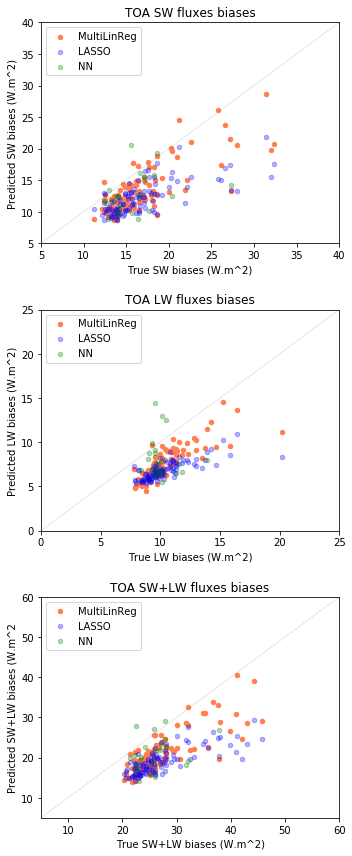

In [61]:
plt.subplots(figsize=(5,12))

#########################
plt.subplot(311)
ax = plt.gca()

title="TOA SW fluxes biases"
fluxes_biases.plot(kind='scatter', x='bias_SW_true', y='bias_SW_pred', color='coral',  
                     marker="o", ax = ax)
fluxes_biases.plot(kind='scatter', x='bias_SW_true', y='bias_SW_pred_LASSO', color='blue', alpha=0.3, 
                     marker="o", ax = ax)
fluxes_biases.plot(kind='scatter', x='bias_SW_true', y='bias_SW_pred_NN', color='green', alpha=0.3, 
                     marker="o", ax = ax)

#plt.hlines(Biases_official_SW_LW,xmin = -2.0,xmax = -0.5,label='official simulation', colors='gray', 
#           linestyles='solid')
#plt.vlines(Feedbacks_official,ymin = 5,ymax = 60,label='official simulation', colors='gray', 
#           linestyles='solid')

plt.xlabel('True SW biases (W.m^2)')#, fontsize=18)
plt.ylabel('Predicted SW biases (W.m^2)')#, fontsize=18)
plt.legend(['MultiLinReg', 'LASSO', 'NN'])
plt.title(title)#, fontsize=22)
plt.ylim(5,40)
plt.xlim(5,40)
ax.plot((5, 40), (5, 40), linewidth=1.0, color='gray', alpha=0.2)

#########################
plt.subplot(312)
ax1 = plt.gca()

title="TOA LW fluxes biases"
fluxes_biases.plot(kind='scatter', x='bias_LW_true', y='bias_LW_pred', color='coral', 
                     marker="o", ax = ax1)
fluxes_biases.plot(kind='scatter', x='bias_LW_true', y='bias_LW_pred_LASSO', color='blue', alpha=0.3,  
                     marker="o", ax = ax1)
fluxes_biases.plot(kind='scatter', x='bias_LW_true', y='bias_LW_pred_NN', color='green', alpha=0.3, 
                     marker="o", ax = ax1)

#plt.hlines(Biases_official_SW_LW,xmin = -2.0,xmax = -0.5,label='official simulation', colors='gray', 
#           linestyles='solid')
#plt.vlines(Feedbacks_official,ymin = 5,ymax = 60,label='official simulation', colors='gray', 
#           linestyles='solid')

plt.xlabel('True LW biases (W.m^2)')#, fontsize=18)
plt.ylabel('Predicted LW biases (W.m^2)')#, fontsize=18)
plt.legend(['MultiLinReg', 'LASSO', 'NN'])
plt.title(title)#, fontsize=22)
plt.ylim(0,25)
plt.xlim(0,25)
ax1.plot((0, 25), (0, 25), linewidth=1.0, color='gray', alpha=0.2)

#########################
plt.subplot(313)
ax2 = plt.gca()

title="TOA SW+LW fluxes biases"
fluxes_biases.plot(kind='scatter', x='bias_SW+LW_true', y='bias_SW+LW_pred', color='coral', 
                     marker="o", ax = ax2)
fluxes_biases.plot(kind='scatter', x='bias_SW+LW_true', y='bias_SW+LW_pred_LASSO', color='blue', alpha=0.3,  
                     marker="o", ax = ax2)
fluxes_biases.plot(kind='scatter', x='bias_SW+LW_true', y='bias_SW+LW_pred_NN', color='green', alpha=0.3, 
                     marker="o", ax = ax2)

#plt.hlines(Biases_official_SW_LW,xmin = -2.0,xmax = -0.5,label='official simulation', colors='gray', 
#           linestyles='solid')
#plt.vlines(Feedbacks_official,ymin = 5,ymax = 60,label='official simulation', colors='gray', 
#           linestyles='solid')

plt.xlabel('True SW+LW biases (W.m^2)')#, fontsize=18)
plt.ylabel('Predicted SW+LW biases (W.m^2')#, fontsize=18)
plt.legend(['MultiLinReg', 'LASSO', 'NN'])
plt.title(title)#, fontsize=22)
plt.ylim(5,60)
plt.xlim(5,60)
ax2.plot((5, 60), (5, 60), linewidth=1.0, color='gray', alpha=0.2)

#Ajustement des subplots
plt.tight_layout()
plt.subplots_adjust(hspace = 0.30)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/Biases_VS_feedbacks.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

In [62]:
len(Feedbacks_val)

102

In [63]:
PC_df_PPE['Feedbacks'] = Feedbacks
PC_val_df['Feedbacks'] = Feedbacks_val
PC_val_df_LASSO['Feedbacks'] = Feedbacks_val_LASSO
#PC_val_df_NN['Feedbacks'] = Feedbacks_val_NN
#PC_val_df_NN

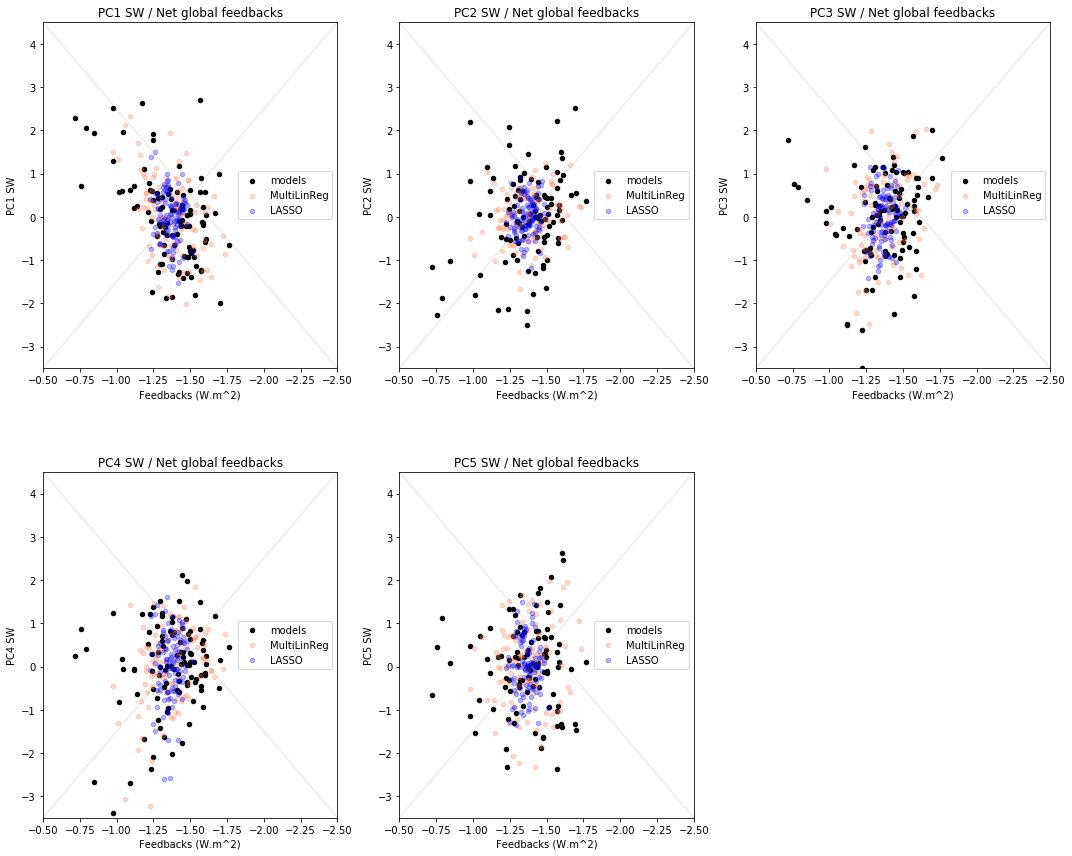

In [64]:
plt.subplots(figsize=(15,12))

#########################
plt.subplot(231)
ax0 = plt.gca()

title="PC1 SW / Net global feedbacks"
PC_df_PPE.plot(kind='scatter', x='Feedbacks', y='pc1', color='black',  
                     marker="o", ax = ax0)
PC_val_df.plot(kind='scatter', x='Feedbacks', y='pc1', color='coral', alpha=0.3, 
                     marker="o", ax = ax0)
PC_val_df_LASSO.plot(kind='scatter', x='Feedbacks', y='pc1', color='blue', alpha=0.3, 
                     marker="o", ax = ax0)

#plt.hlines(Biases_official_SW_LW,xmin = -2.0,xmax = -0.5,label='official simulation', colors='gray', 
#           linestyles='solid')
#plt.vlines(Feedbacks_official,ymin = -10,ymax = 10,label='official simulation', colors='navy', 
#           linestyles='dashdot')

plt.xlabel('Feedbacks (W.m^2)')#, fontsize=18)
plt.ylabel('PC1 SW')#, fontsize=18)
plt.legend(['models', 'MultiLinReg', 'LASSO'])
plt.title(title)#, fontsize=22)
plt.ylim(-3.5,4.5)
plt.xlim(-0.5,-2.5)
ax0.plot((-0.5,-2.5), (-3.5, 4.5), linewidth=1.0, color='gray', alpha=0.2)
ax0.plot((-0.5,-2.5), (4.5, -3.5), linewidth=1.0, color='gray', alpha=0.2)

#########################
plt.subplot(232)
ax1 = plt.gca()

title="PC2 SW / Net global feedbacks"
PC_df_PPE.plot(kind='scatter', x='Feedbacks', y='pc2', color='black',  
                     marker="o", ax = ax1)
PC_val_df.plot(kind='scatter', x='Feedbacks', y='pc2', color='coral', alpha=0.3, 
                     marker="o", ax = ax1)
PC_val_df_LASSO.plot(kind='scatter', x='Feedbacks', y='pc2', color='blue', alpha=0.3, 
                     marker="o", ax = ax1)

#plt.hlines(Biases_official_SW_LW,xmin = -2.0,xmax = -0.5,label='official simulation', colors='gray', 
#           linestyles='solid')
#plt.vlines(Feedbacks_official,ymin = -10,ymax = 10,label='official simulation', colors='gray', 
#           linestyles='solid')

plt.xlabel('Feedbacks (W.m^2)')#, fontsize=18)
plt.ylabel('PC2 SW')#, fontsize=18)
plt.legend(['models', 'MultiLinReg', 'LASSO'])
plt.title(title)#, fontsize=22)
plt.ylim(-3.5, 4.5)
plt.xlim(-0.5,-2.5)
ax1.plot((-0.5,-2.5), (-3.5, 4.5), linewidth=1.0, color='gray', alpha=0.2)
ax1.plot((-0.5,-2.5), (4.5, -3.5), linewidth=1.0, color='gray', alpha=0.2)

#########################
plt.subplot(233)
ax2 = plt.gca()

title="PC3 SW / Net global feedbacks"
PC_df_PPE.plot(kind='scatter', x='Feedbacks', y='pc3', color='black',  
                     marker="o", ax = ax2)
PC_val_df.plot(kind='scatter', x='Feedbacks', y='pc3', color='coral', alpha=0.3, 
                     marker="o", ax = ax2)
PC_val_df_LASSO.plot(kind='scatter', x='Feedbacks', y='pc3', color='blue', alpha=0.3, 
                     marker="o", ax = ax2)

#plt.hlines(Biases_official_SW_LW,xmin = -2.0,xmax = -0.5,label='official simulation', colors='gray', 
#           linestyles='solid')
#plt.vlines(Feedbacks_official,ymin = -10,ymax = 10,label='official simulation', colors='gray', 
#           linestyles='solid')

plt.xlabel('Feedbacks (W.m^2)')#, fontsize=18)
plt.ylabel('PC3 SW')#, fontsize=18)
plt.legend(['models', 'MultiLinReg', 'LASSO'])
plt.title(title)#, fontsize=22)
plt.ylim(-3.5, 4.5)
plt.xlim(-0.5,-2.5)
ax2.plot((-0.5,-2.5), (-3.5, 4.5), linewidth=1.0, color='gray', alpha=0.2)
ax2.plot((-0.5,-2.5), (4.5, -3.5), linewidth=1.0, color='gray', alpha=0.2)

#########################
plt.subplot(234)
ax3 = plt.gca()

title="PC4 SW / Net global feedbacks"
PC_df_PPE.plot(kind='scatter', x='Feedbacks', y='pc4', color='black',  
                     marker="o", ax = ax3)
PC_val_df.plot(kind='scatter', x='Feedbacks', y='pc4', color='coral', alpha=0.3, 
                     marker="o", ax = ax3)
PC_val_df_LASSO.plot(kind='scatter', x='Feedbacks', y='pc4', color='blue', alpha=0.3, 
                     marker="o", ax = ax3)

#plt.hlines(Biases_official_SW_LW,xmin = -2.0,xmax = -0.5,label='official simulation', colors='gray', 
#           linestyles='solid')
#plt.vlines(Feedbacks_official,ymin = -10,ymax = 10,label='official simulation', colors='gray', 
#           linestyles='solid')

plt.xlabel('Feedbacks (W.m^2)')#, fontsize=18)
plt.ylabel('PC4 SW')#, fontsize=18)
plt.legend(['models', 'MultiLinReg', 'LASSO'])
plt.title(title)#, fontsize=22)
plt.ylim(-3.5,4.5)
plt.xlim(-0.5,-2.5)
ax3.plot((-0.5,-2.5), (-3.5, 4.5), linewidth=1.0, color='gray', alpha=0.2)
ax3.plot((-0.5,-2.5), (4.5, -3.5), linewidth=1.0, color='gray', alpha=0.2)

#########################
plt.subplot(235)
ax4 = plt.gca()

title="PC5 SW / Net global feedbacks"
PC_df_PPE.plot(kind='scatter', x='Feedbacks', y='pc5', color='black',  
                     marker="o", ax = ax4)
PC_val_df.plot(kind='scatter', x='Feedbacks', y='pc5', color='coral', alpha=0.3, 
                     marker="o", ax = ax4)
PC_val_df_LASSO.plot(kind='scatter', x='Feedbacks', y='pc5', color='blue', alpha=0.3, 
                     marker="o", ax = ax4)

#plt.hlines(Biases_official_SW_LW,xmin = -2.0,xmax = -0.5,label='official simulation', colors='gray', 
#           linestyles='solid')
#plt.vlines(Feedbacks_official,ymin = -10,ymax = 10,label='official simulation', colors='gray', 
#           linestyles='solid')

plt.xlabel('Feedbacks (W.m^2)')#, fontsize=18)
plt.ylabel('PC5 SW')#, fontsize=18)
plt.legend(['models', 'MultiLinReg', 'LASSO'])
plt.title(title)#, fontsize=22)
plt.ylim(-3.5, 4.5)
plt.xlim(-0.5,-2.5)
ax4.plot((-0.5,-2.5), (-3.5, 4.5), linewidth=1.0, color='gray', alpha=0.2)
ax4.plot((-0.5,-2.5), (4.5, -3.5), linewidth=1.0, color='gray', alpha=0.2)

#########################

#Ajustement des subplots
plt.tight_layout()
plt.subplots_adjust(hspace = 0.30)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/Biases_VS_feedbacks.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

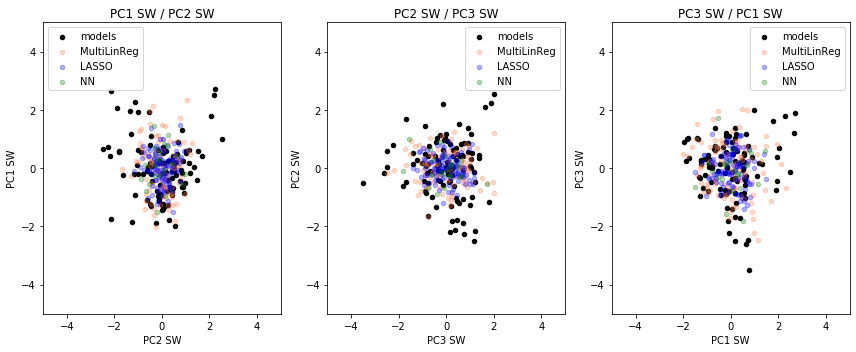

In [65]:
plt.subplots(figsize=(12,5))

#########################
plt.subplot(131)
ax0 = plt.gca()

title="PC1 SW / PC2 SW"
PC_df_PPE.plot(kind='scatter', x='pc2', y='pc1', color='black',  
                     marker="o", ax = ax0)
PC_val_df.plot(kind='scatter', x='pc2', y='pc1', color='coral', alpha=0.3, 
                     marker="o", ax = ax0)
PC_val_df_LASSO.plot(kind='scatter', x='pc2', y='pc1', color='blue', alpha=0.3, 
                     marker="o", ax = ax0)
PC_val_df_NN.plot(kind='scatter', x='pc2', y='pc1', color='green', alpha=0.3, 
                     marker="o", ax = ax0)

#plt.hlines(Biases_official_SW_LW,xmin = -2.0,xmax = -0.5,label='official simulation', colors='gray', 
#           linestyles='solid')
#plt.vlines(Feedbacks_official,ymin = -10,ymax = 10,label='official simulation', colors='navy', 
#           linestyles='dashdot')

plt.xlabel('PC2 SW')#, fontsize=18)
plt.ylabel('PC1 SW')#, fontsize=18)
plt.legend(['models', 'MultiLinReg', 'LASSO', 'NN'])
plt.title(title)#, fontsize=22)
plt.ylim(-5,5)
plt.xlim(-5,5)

#########################
plt.subplot(132)
ax1 = plt.gca()

title="PC2 SW / PC3 SW"
PC_df_PPE.plot(kind='scatter', x='pc3', y='pc2', color='black',  
                     marker="o", ax = ax1)
PC_val_df.plot(kind='scatter', x='pc3', y='pc2', color='coral', alpha=0.3, 
                     marker="o", ax = ax1)
PC_val_df_LASSO.plot(kind='scatter', x='pc3', y='pc2', color='blue', alpha=0.3, 
                     marker="o", ax = ax1)
PC_val_df_NN.plot(kind='scatter', x='pc3', y='pc2', color='green', alpha=0.3, 
                     marker="o", ax = ax1)

#plt.hlines(Biases_official_SW_LW,xmin = -2.0,xmax = -0.5,label='official simulation', colors='gray', 
#           linestyles='solid')
#plt.vlines(Feedbacks_official,ymin = -10,ymax = 10,label='official simulation', colors='gray', 
#           linestyles='solid')

plt.xlabel('PC3 SW')#, fontsize=18)
plt.ylabel('PC2 SW')#, fontsize=18)
plt.legend(['models', 'MultiLinReg', 'LASSO', 'NN'])
plt.title(title)#, fontsize=22)
plt.ylim(-5,5)
plt.xlim(-5,5)

#########################
plt.subplot(133)
ax2 = plt.gca()

title="PC3 SW / PC1 SW"
PC_df_PPE.plot(kind='scatter', x='pc1', y='pc3', color='black',  
                     marker="o", ax = ax2)
PC_val_df.plot(kind='scatter', x='pc1', y='pc3', color='coral', alpha=0.3, 
                     marker="o", ax = ax2)
PC_val_df_LASSO.plot(kind='scatter', x='pc1', y='pc3', color='blue', alpha=0.3, 
                     marker="o", ax = ax2)
PC_val_df_NN.plot(kind='scatter', x='pc1', y='pc3', color='green', alpha=0.3, 
                     marker="o", ax = ax2)

#plt.hlines(Biases_official_SW_LW,xmin = -2.0,xmax = -0.5,label='official simulation', colors='gray', 
#           linestyles='solid')
#plt.vlines(Feedbacks_official,ymin = -10,ymax = 10,label='official simulation', colors='gray', 
#           linestyles='solid')

plt.xlabel('PC1 SW')#, fontsize=18)
plt.ylabel('PC3 SW')#, fontsize=18)
plt.legend(['models', 'MultiLinReg', 'LASSO', 'NN'])
plt.title(title)#, fontsize=22)
plt.ylim(-5,5)
plt.xlim(-5,5)

#########################

#Ajustement des subplots
plt.tight_layout()
plt.subplots_adjust(hspace = 0.30)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/Biases_VS_feedbacks.png", 
#        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()

In [ ]:
def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

In [ ]:
title="PC1 SW / PC2 SW"
x = PC_val_df_NN['pc2']
y = PC_val_df_NN['pc1']

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(10, 10))
ax1 = plt.gca()

ax1 = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax1)
ax_histy = fig.add_axes(rect_histy, sharey=ax1)

# use the previously defined function
scatter_hist(x, y, ax1, ax_histx, ax_histy)

PC_df_PPE.plot(kind='scatter', x='pc1', y='pc3', color='black',  
                     marker="o", ax = ax1)
PC_val_df.plot(kind='scatter', x='pc3', y='pc2', color='coral', alpha=0.3, 
                     marker="o", ax = ax1)
PC_val_df_LASSO.plot(kind='scatter', x='pc3', y='pc2', color='blue', alpha=0.3, 
                     marker="o", ax = ax1)
#PC_val_df_NN.plot(kind='scatter', x='pc3', y='pc2', color='green', alpha=0.3, 
#                     marker="o", ax = ax1)


#plt.xlabel('PC2 SW')#, fontsize=18)
#plt.ylabel('PC1 SW')#, fontsize=18)
#plt.legend(['models', 'MultiLinReg', 'LASSO', 'NN'])
#plt.title(title)#, fontsize=22)
#plt.ylim(-5,5)
#plt.xlim(-5,5)

plt.show()